# Import Libraries


In [ ]:
#Topic: Fitness Tracker Product Discount Price Predictor
#Group Number: 48
#EG/2020/4118 - Prashan T.D.R
#EG/2020/4293 - Wijesekara D.N.M

import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway
#from sklearn import metrics
%matplotlib inline

## Dataset Import


In [ ]:
df=pd.read_csv(r'/content/smartwatches.csv')
df.drop_duplicates(inplace=True)

#train_df=df.sample(frac=0.8,random_state=42)
#test_df=df.drop(train_df.index)
#train_df=train_df.reset_index()
#test_df=test_df.reset_index()
train_df = df.copy()

## Dimensions of Dataset

In [ ]:
df.shape,train_df.shape

((450, 16), (450, 16))

## First 5 data from dataset

In [ ]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


## Show null values

In [ ]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [ ]:
train_df['Display Size'].isna().sum()

30

### Distinct Values of feature

In [ ]:
train_df['Display Size'].value_counts().count()

40

# Clean Data

## Fill nulls with dummy value

In [ ]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

In [ ]:
train_df['Display Size'].isna().sum()

0

## Change values to integer

In [ ]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [ ]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

## Revert back null values

In [ ]:
train_df['Display Size'].replace(0.0, np.nan, inplace=True)

In [ ]:
train_df['Display Size'].isna().sum()

31

In [ ]:
train_df.isna().sum()

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            31
Weight                 186
dtype: int64

In [ ]:
train_df['Weight'].value_counts()

20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: Weight, dtype: int64

## Replace each values with float

### use mean value for range values

In [ ]:
cal = sum([int(x) for x in re.findall('\d+', '20 - 35 g')])/2
train_df['Weight'].replace('20 - 35 g', cal, inplace=True)

In [ ]:
cal = sum([int(x) for x in re.findall('\d+', '35 - 50 g')])/2
train_df['Weight'].replace('35 - 50 g', cal, inplace=True)

In [ ]:
cal = sum([int(x) for x in re.findall('\d+', '50 - 75 g')])/2
train_df['Weight'].replace('50 - 75 g', cal, inplace=True)

In [ ]:
train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)

In [ ]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)

In [ ]:
train_df['Weight'].value_counts()

27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: Weight, dtype: int64

### Info on each features on dataset

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         419 non-null    float64
 15  Weight               264 non-null    flo

In [ ]:
train_df.isna().sum()

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            31
Weight                 186
dtype: int64

## Column creation and removal

Using Discount Percentage and Original Price to calculate Discount Price and Remove Discount Percentage

In [ ]:
train_df['Discount Price'] = (train_df['Original Price'] * (-train_df['Discount Percentage']))/100
train_df.drop(['Discount Percentage'], axis = 1, inplace=True)

## Numerical Data

In [ ]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [ ]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [ ]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000


In [ ]:
train_df[numerical_col].isnull().sum()

Current Price           10
Original Price          73
Rating                   6
Number OF Ratings       59
Battery Life (Days)     32
Display Size            31
Weight                 186
Discount Price          73
dtype: int64

## Plot numerical data

### KDE plot

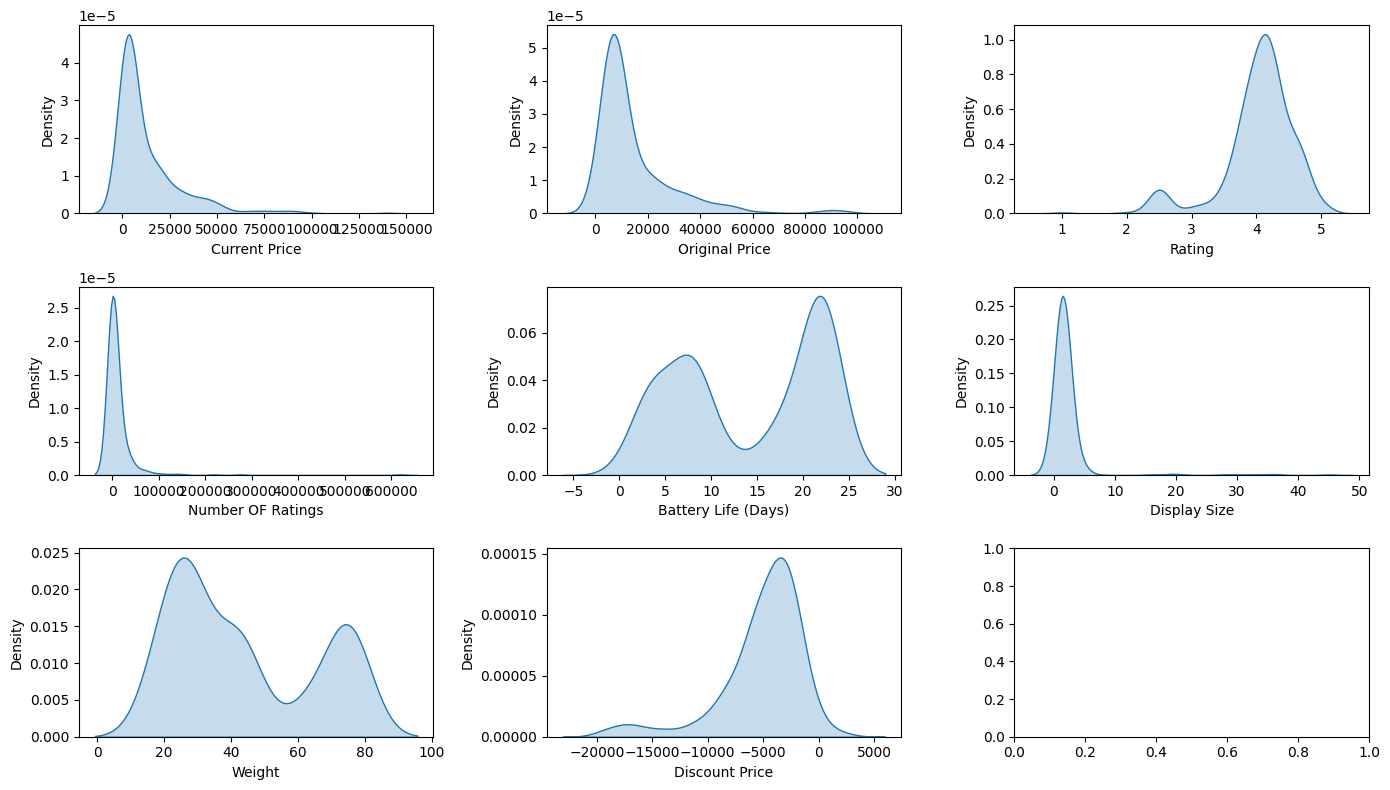

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,8) )

for i, column in enumerate(numerical_col):
  row = i//3
  col = i%3
  ax = axes[row,col]
  sns.kdeplot(data=train_df[column],ax=ax, fill=True)

fig.tight_layout()
plt.show()

### Box plot

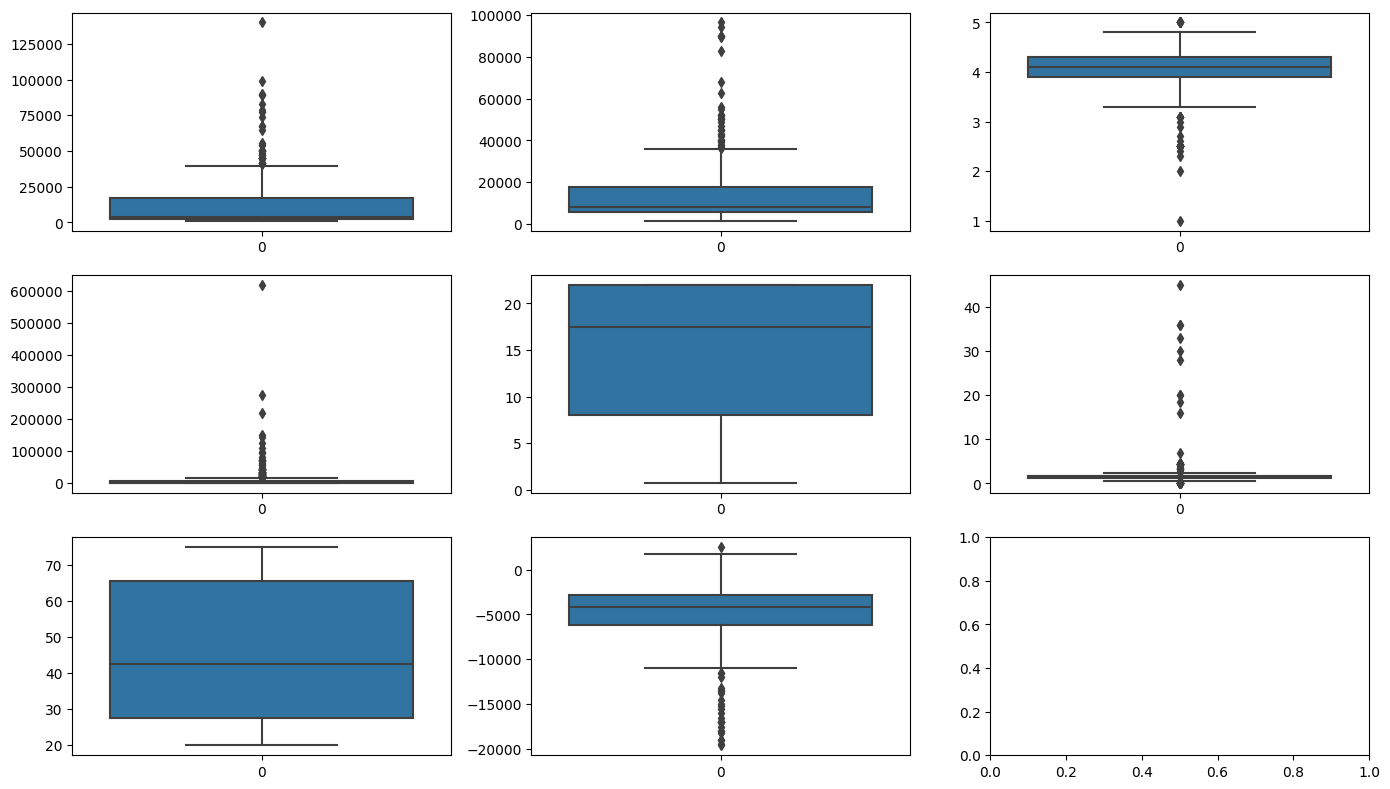

In [ ]:
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(14,8) )

for i, column in enumerate(numerical_col):
  row = i//3
  col = i%3
  ax = axes[row,col]
  sns.boxplot(data=train_df[column],ax=ax)

fig.tight_layout()
plt.show()

## Function definition on Outliers removal

In [ ]:
def remove_outliers_IQR(data, col):
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

# Remove outliers and imputation null values

In [ ]:
train_df.columns
train_df.shape
import_col = ['Current Price', 'Original Price', 'Rating', 'Number OF Ratings', 'Display Size']
for col in import_col:
  train_df = remove_outliers_IQR(train_df, col)

for col in numerical_col:
  print(col)
  train_df[col].fillna(train_df[col].median(), inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [ ]:
train_df[numerical_col].isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

## Feature scaling

In [ ]:
Scaler = MinMaxScaler()
data = Scaler.fit_transform(train_df[numerical_col[:-1]])
data = pd. DataFrame(data, columns=numerical_col[:-1])

In [ ]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [ ]:
data.shape, train_df.shape

((181, 7), (181, 16))

In [ ]:
data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [ ]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)
train_df = pd.concat([train_df.reset_index(),data], axis=1)

## Categorical Data

In [ ]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object' ]

In [ ]:
categorical_col
train_df[categorical_col].values

array([['fire-boltt', 'BSW046', nan, ..., 'Silicon', 'Yes', 'Yes'],
       ['boat', 'Wave Call', nan, ..., 'Silicon', 'Yes', 'Yes'],
       ['fire-boltt', 'BSW053', nan, ..., 'Silicon', 'Yes', 'Yes'],
       ...,
       ['zebronics', 'Fitness band', 'Rectangle', ..., 'Silicon', 'Yes',
        'Yes'],
       ['fire-boltt', 'bsw016', 'Square', ..., 'Silicon', 'Yes', 'Yes'],
       ['fire-boltt', 'ring', 'Square', ..., 'Rubber', 'Yes', 'Yes']],
      dtype=object)

In [ ]:
train_df['Bluetooth'].value_counts()

Yes    181
Name: Bluetooth, dtype: int64

In [ ]:
train_df['Touchscreen'].value_counts()

Yes    174
No       1
Name: Touchscreen, dtype: int64

### Remove bluetooth for only having one distinct value

In [ ]:
categorical_col.remove('Bluetooth')

## ANOVA results

In [ ]:
for col in categorical_col:
  CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
  AnovaResults = f_oneway(*CategoryGroupLists)
  print(col, ': ', 'P-value for anova is : ', AnovaResults[1])


Brand :  P-value for anova is :  8.421850586222326e-14
Model Name :  P-value for anova is :  4.263744302000662e-05
Dial Shape :  P-value for anova is :  0.0001236872758889996
Strap Color :  P-value for anova is :  0.06574836943894026
Strap Material :  P-value for anova is :  0.00039800860157354883
Touchscreen :  P-value for anova is :  0.9803878528536762


In [ ]:
imp_col = ['Brand', 'Model Name','Dial Shape', 'Strap Material']

In [ ]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material
0,fire-boltt,BSW046,NaN,Silicon
1,boat,Wave Call,NaN,Silicon
2,fire-boltt,BSW053,NaN,Silicon
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,Other
4,noise,NSW-05,NaN,Other


In [ ]:
train_df[imp_col].isna().sum()

Brand              0
Model Name         9
Dial Shape        65
Strap Material    26
dtype: int64

## Fill null values with 'other' value

In [ ]:
for col in imp_col:
  train_df[col].fillna('other', inplace=True)

In [ ]:
train_df[imp_col].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [ ]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material
0,fire-boltt,BSW046,other,Silicon
1,boat,Wave Call,other,Silicon
2,fire-boltt,BSW053,other,Silicon
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,other,Other
4,noise,NSW-05,other,Other


In [ ]:
train_df['Brand'].value_counts()

noise         29
boat          20
fire-boltt    19
dizo          17
honor         14
pebble        13
amazfit       12
gizmore       11
fossil         9
ambrane        8
zebronics      7
huawei         7
crossbeats     4
fitbit         4
garmin         3
samsung        3
hammer         1
Name: Brand, dtype: int64

# Convert categorical to binary

In [ ]:
brand = pd.get_dummies(train_df['Brand'])
model_name = pd.get_dummies(train_df['Model Name']).drop(['other'], axis=1)
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop(['other'], axis=1)
strap_material = pd.get_dummies(train_df['Strap Material']).drop(['other'], axis=1)

In [ ]:
imp_df = pd.concat([brand, model_name, dial_shape, strap_material], axis=1)

In [ ]:
imp_df.head()



,amazfit,ambrane,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_df = pd.concat([train_df[numerical_col], imp_df], axis=1)

In [ ]:
new_df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,amazfit,ambrane,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 202, dtype: int64

## Training & Testing

In [ ]:
df=new_df

## Drop output value and defining X and y

In [ ]:
X = df.drop('Discount Price', axis = 1)
y = df['Discount Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)   # 80% training, 20% testing

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

res = r2_score(y_test, y_pred)
print(res)

-3620.084222635181


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the parameter grid for Ridge regression
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create a pipeline with StandardScaler and Ridge Regression
model = make_pipeline(StandardScaler(), Ridge())

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model from the hyperparameter tuning
best_model = grid_search.best_estimator_

# Make predictions and evaluate the best model
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Best R2 score:", r2)
print("Best alpha:", best_model.named_steps['ridge'].alpha)


Best R2 score: 0.8704159597707317
Best alpha: 0.001


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Ridge Regression model
model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10])

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)
print("Best alpha:", model.alpha_)


R2 score: 0.8704159597695442
Best alpha: 0.001
